In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import pandas as pd
import sys
%precision 4

'%.4f'

In [2]:
S = 100
K = np.arange(75,126,5)
T = 1
r = 0.05
d = 0.01
sigma = 0.2
N = 365
npaths = 10000

In [3]:
# def MC_barrier(S, K, T, r, d, sigma, npaths, N, barrier, flag1, flag2):
        
#     dt=T/N
#     a = 0
#     nsteps=N
#     payoff = 0
#     Spath=np.zeros((2*npaths,nsteps))
#     zin = np.random.standard_normal((npaths,nsteps))

#     z = np.vstack((zin,-zin)) 
#     z = stats.zscore(z)
#     Spath[:,0]=S*np.exp((r-d-sigma**2/2)*dt+sigma*np.sqrt(dt)*z[:,0])
#     for j in np.arange(1,nsteps):
#         Spath[:,j]=Spath[:,j-1]*np.exp((r-d-sigma**2/2)*dt+sigma*np.sqrt(dt)*z[:,j])
    
#     for j in range(0, Spath.shape[0]):

#         if flag2 == 'down in':

#             if Spath[j, :].min() < barrier:
 
#                 if flag1 == 'call':
#                     payoff = np.maximum(Spath[j,-1] - K,0) + payoff
                    
#                 elif flag1 == 'put':

#                     payoff = np.maximum(K - Spath[j,-1],0) + payoff

#             elif Spath[j, :].min() > barrier:
#                 pass
#             a = a + 1
            
#         elif flag2 == 'down out':

#             if Spath[j, :].min() > barrier :

#                 if flag1 == 'call':
#                     payoff = np.maximum(Spath[j,-1] - K,0) + payoff
                            
#                 elif flag1 == 'put':
#                     payoff = np.maximum(K - Spath[j,-1],0) + payoff

#             elif Spath[j, :].min() < barrier:
#                 pass
#             a = a + 1
#         elif flag2 == 'up in':
#             if Spath[j,:].max() > barrier:

#                 if flag1 == 'call':
#                     payoff = np.maximum(Spath[j,-1] - K,0) + payoff

#                 elif flag1 == 'put':
#                     payoff = np.maximum(K - Spath[j,-1],0) + payoff

#             elif Spath[j,:].max() < barrier:
#                 pass
#             a = a + 1
        
#         elif flag2 == 'up out':
#             if Spath[j, :].max() < barrier :
#                 if flag1 == 'call':
                    
#                     payoff = np.maximum(Spath[j,-1] - K,0) + payoff
                    
#                 elif flag1 == 'put':
#                     payoff = np.maximum(K - Spath[j,-1],0) + payoff

#             elif Spath[j, :].max() > barrier:
#                 pass
#             a = a + 1
#     option_price = (payoff/a)*np.exp(-r*T)


#     return option_price

In [4]:
def MC_barrier(S, K, T, r, d, sigma, npaths, N, barrier, flag1, flag2):
        
    dt=T/N
    nsteps=N
    
    Spath=np.zeros((2*npaths,nsteps))
    zin = np.random.standard_normal((npaths,nsteps))
    
    z = np.vstack((zin,-zin)) 
    z = stats.zscore(z)
    Spath[:,0]=S*np.exp((r-d-sigma**2/2)*dt+sigma*np.sqrt(dt)*z[:,0])
    for j in np.arange(1,nsteps):
        Spath[:,j]=Spath[:,j-1]*np.exp((r-d-sigma**2/2)*dt+sigma*np.sqrt(dt)*z[:,j])
    payoff = np.zeros(Spath.shape[0])
    for j in range(0, Spath.shape[0]):

        if flag2 == 'down in':

            if Spath[j, :].min() < barrier:
 
                if flag1 == 'call':
                    payoff[j] = np.maximum(Spath[j,-1] - K,0)
                    
                elif flag1 == 'put':

                    payoff[j] = np.maximum(K - Spath[j,-1],0)

            elif Spath[j, :].min() > barrier:
                payoff[j] = 0
            
        elif flag2 == 'down out':

            if Spath[j, :].min() > barrier :

                if flag1 == 'call':
                    payoff[j] = np.maximum(Spath[j,-1] - K,0)
                            
                elif flag1 == 'put':
                    payoff[j] = np.maximum(K - Spath[j,-1],0)

            elif Spath[j, :].min() < barrier:
                payoff[j] = 0

        elif flag2 == 'up in':
            if Spath[j,:].max() > barrier:

                if flag1 == 'call':
                    payoff[j] = np.maximum(Spath[j,-1] - K,0)

                elif flag1 == 'put':
                    payoff[j] = np.maximum(K - Spath[j,-1],0)

            elif Spath[j,:].max() < barrier:
                payoff[j] = 0
        
        elif flag2 == 'up out':
            
            if Spath[j, :].max() < barrier :
                
                if flag1 == 'call':
                    
                    payoff[j] = np.maximum(Spath[j,-1] - K,0)
                    
                elif flag1 == 'put':
                    payoff[j] = np.maximum(K - Spath[j,-1],0)

            elif Spath[j, :].max() > barrier:
                payoff[j] = 0
    option_price = np.mean(payoff)*np.exp(-r*T)


    return option_price

In [5]:
barrier_call = 110
barrier_put = 90

In [6]:
MC_barrier_v = np.vectorize(MC_barrier)

In [7]:
option_price_put_down_in = MC_barrier_v(S, K, T, r, d, sigma, npaths, N, barrier = barrier_put, flag1="put", flag2 = 'down in')
option_price_put_down_in

array([ 0.3708,  0.751 ,  1.4922,  2.5041,  3.9615,  5.8166,  7.8081,
       10.0619, 12.4046, 14.8463, 17.3823])

In [8]:
option_price_put_down_out = MC_barrier_v(S, K, T, r, d, sigma, npaths, N, barrier = barrier_put, flag1="put", flag2 = 'down out')
option_price_put_down_out

array([0.    , 0.    , 0.    , 0.    , 0.0262, 0.1799, 0.5602, 1.221 ,
       2.1264, 3.2598, 4.6991])

In [9]:
option_price_call_up_in = MC_barrier_v(S, K, T, r, d, sigma, npaths, N, barrier = barrier_call,flag1 = 'call', flag2 = "up in")
option_price_call_up_in

array([23.698 , 20.6743, 17.7176, 14.8182, 12.2321,  9.5902,  7.4722,
        5.5591,  4.0595,  2.9993,  2.108 ])

In [10]:
option_price_call_up_out = MC_barrier_v(S, K, T, r, d, sigma, npaths, N, barrier = barrier_call,flag1 = 'call', flag2 = "up out")
option_price_call_up_out

array([4.3011, 2.9699, 1.8363, 1.0354, 0.4484, 0.1491, 0.0181, 0.    ,
       0.    , 0.    , 0.    ])

In [11]:
optionperstrike = pd.DataFrame()
optionperstrike['Strikes'] = K 
optionperstrike['option_price_put_down_in'] = option_price_put_down_in
optionperstrike['option_price_put_down_out'] = option_price_put_down_out
optionperstrike['option_price_call_up_in'] = option_price_call_up_in
optionperstrike['option_price_call_up_out'] = option_price_call_up_out

display(optionperstrike)

,Strikes,option_price_put_down_in,option_price_put_down_out,option_price_call_up_in,option_price_call_up_out
0,75,0.370848,0.000000,23.697995,4.301060
1,80,0.751016,0.000000,20.674276,2.969912
2,85,1.492158,0.000000,17.717557,1.836330
3,90,2.504133,0.000000,14.818236,1.035424
4,95,3.961512,0.026242,12.232123,0.448364
5,100,5.816599,0.179938,9.590199,0.149137
6,105,7.808142,0.560239,7.472178,0.018101
7,110,10.061945,1.221048,5.559135,0.000000
8,115,12.404615,2.126367,4.059493,0.000000
9,120,14.846274,3.259761,2.999324,0.000000


Text(0.5, 1.0, 'Put down')

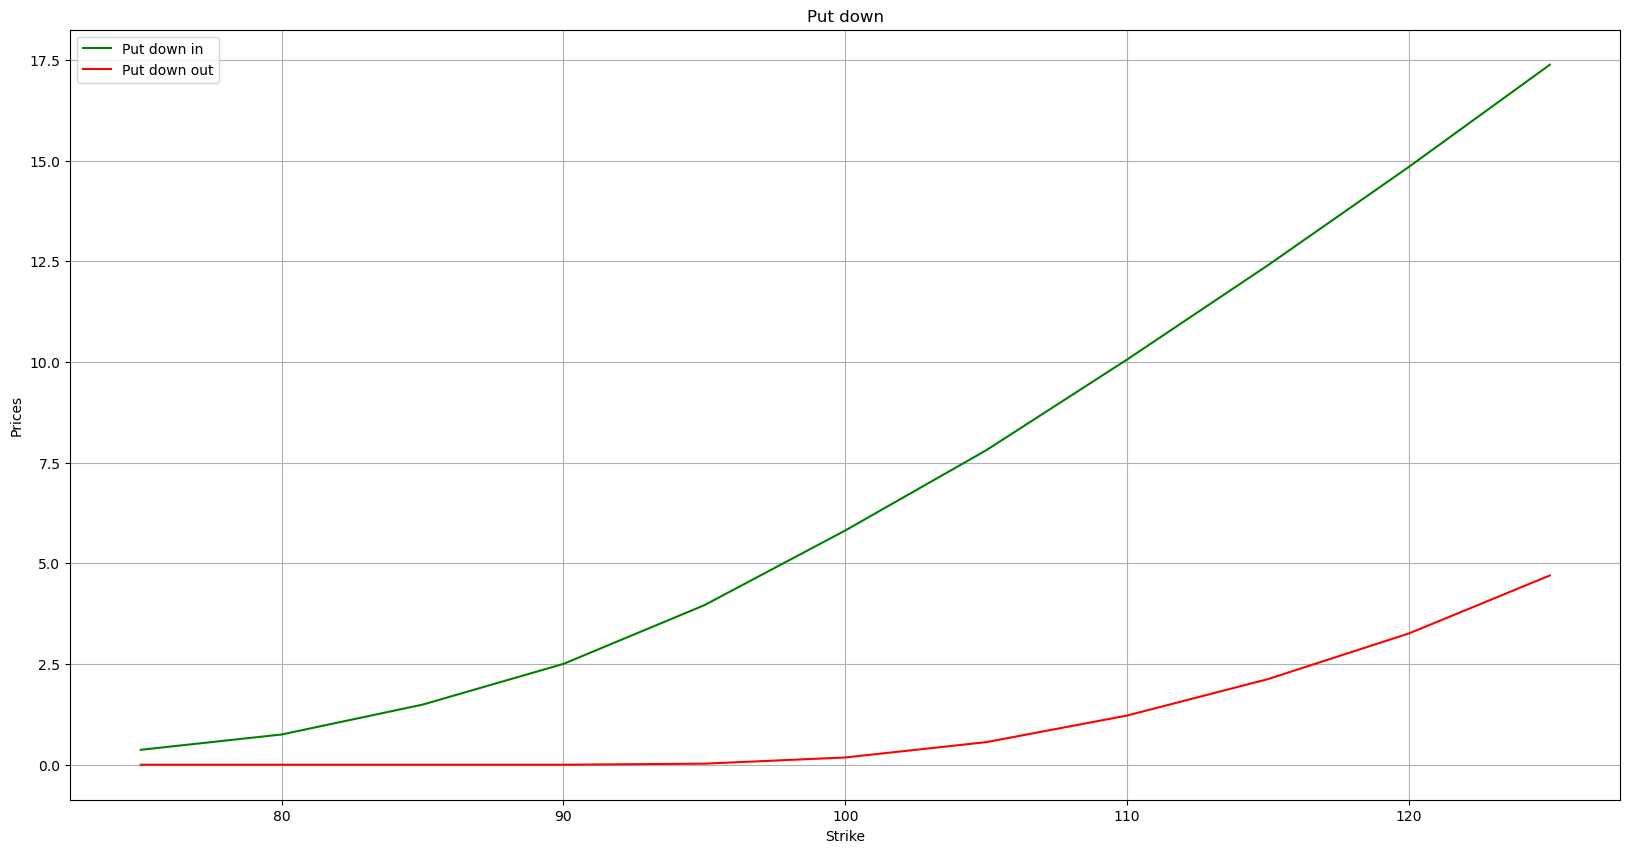

In [12]:
plt.figure(figsize = (20,10)) # διαστάσεις δραγράμματος
plt.plot(optionperstrike.Strikes,optionperstrike.option_price_put_down_in, 'g', lw = 1.5, label='Put down in')
plt.plot(optionperstrike.Strikes,optionperstrike.option_price_put_down_out, 'r', lw = 1.5, label = 'Put down out')
plt.grid(True) # εμφάνιση πλέγματος
plt.legend() # εμφάνιση υπομνήματος
plt.axis('tight') # μορφοποίηση αξόνων
plt.xlabel('Strike') # ετικέτα x-άξονα
plt.ylabel('Prices') # ετικέτα y-άξονα
plt.title('Put down') # τίτλος διαγράμματος


Text(0.5, 1.0, 'Call up')

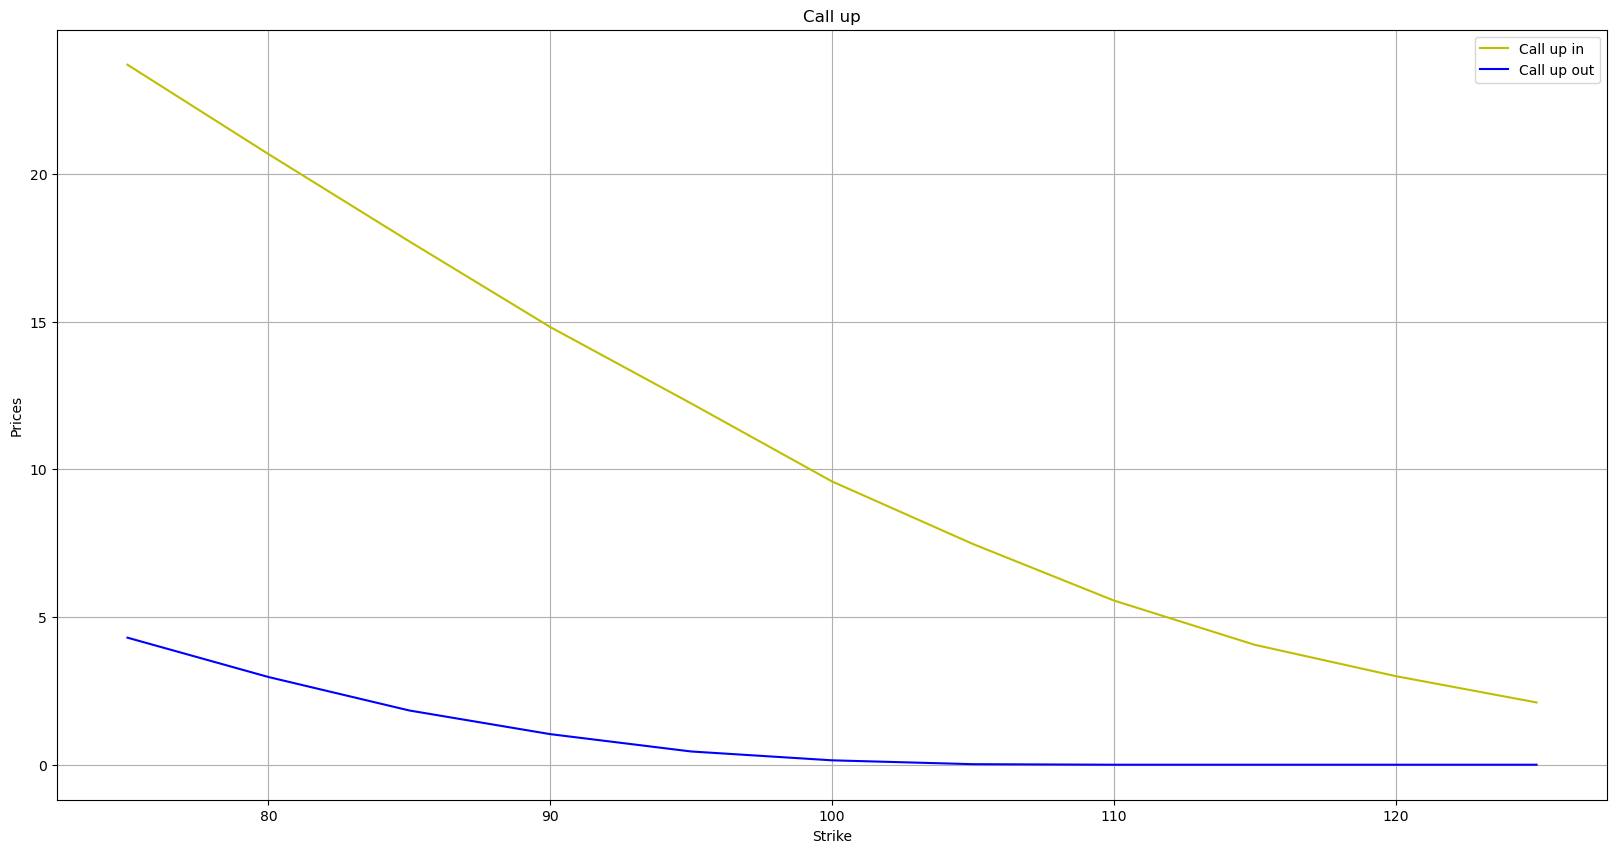

In [13]:
plt.figure(figsize = (20,10)) # διαστάσεις δραγράμματος
plt.plot(optionperstrike.Strikes,optionperstrike.option_price_call_up_in, 'y', lw = 1.5, label='Call up in')
plt.plot(optionperstrike.Strikes,optionperstrike.option_price_call_up_out, 'b', lw = 1.5, label = 'Call up out')
plt.grid(True) # εμφάνιση πλέγματος
plt.legend() # εμφάνιση υπομνήματος
plt.axis('tight') # μορφοποίηση αξόνων
plt.xlabel('Strike') # ετικέτα x-άξονα
plt.ylabel('Prices') # ετικέτα y-άξονα
plt.title('Call up') # τίτλος διαγράμματος